In [1]:
# Εγκατάσταση των βιβλιοθηκών numpy (για αριθμητικούς υπολογισμούς), pandas (για επεξεργασία δεδομένων),
# matplotlib και seaborn (για οπτικοποίηση δεδομένων), scikit-learn (για machine learning) και torch (για deep learning)
# Οι βιβλιοθήκες είναι ήδη εγκατεστημένες στο περιβάλλον και δεν χρειάζεται να τις ξαναεγκαταστήσουμε.
# Αν κάποιος τρέξει το notebook σε νέο περιβάλλον, θα χρειαστεί να εκτελέσει την εξής εντολή για να εγκαταστήσει τις βιβλιοθήκες:
# !pip install numpy pandas matplotlib seaborn scikit-learn torch

In [1]:
# Εισαγωγή των απαραίτητων βιβλιοθηκών

import numpy as np  # Παροχή υποστήριξης για μεγάλους πολυδιάστατους πίνακες και αριθμητικούς υπολογισμούς.
import random  # Παροχή τυχαίων αριθμών και επιλογών.
from sklearn.preprocessing import StandardScaler, label_binarize  # Προεπεξεργασία δεδομένων: StandardScaler για κανονικοποίηση και label_binarize για μετατροπή ετικετών σε δυαδική μορφή.
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc  # Υπολογισμός απόδοσης του μοντέλου (Ακρίβεια, Classification Report, Confusion Matrix, ROC Curve).
import seaborn as sns  # Εργαλείο για στατιστική απεικόνιση και δημιουργία γραφημάτων, π.χ. για Confusion Matrix.
import matplotlib.pyplot as plt  # Βασική βιβλιοθήκη για δημιουργία γραφημάτων και γραφικών απεικονίσεων.
import torch  # Βιβλιοθήκη για υπολογισμούς με GPU και deep learning.
from sklearn.model_selection import GridSearchCV  # Εκτέλεση Grid Search για εύρεση των καλύτερων υπερπαραμέτρων μέσω cross-validation.
from matplotlib.colors import ListedColormap # Δημιουργία προσαρμοσμένων χρωματικών χαρτών για γραφήματα.
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Φoρτώνουμε τα δεδομένα και τα ονόματα των κατηγοριών
data = np.load('train_test_images_normalized_images.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
class_names = data['class_names']  # Φόρτωση των ονομάτων των κατηγοριών

# Εκτύπωση των σχημάτων και των ονομάτων των κατηγοριών
print(f"Φορτώθηκε το Σχήμα Συνόλου Εκπαίδευσης: {X_train.shape}, ετικέτες: {y_train.shape}")
print(f"Φορτώθηκε το Σχήμα Συνόλου Δοκιμής: {X_test.shape}, ετικέτες: {y_test.shape}")
print(f"Ονόματα Κατηγοριών: {class_names}")

Φορτώθηκε το Σχήμα Συνόλου Εκπαίδευσης: (2800, 4096), ετικέτες: (2800,)
Φορτώθηκε το Σχήμα Συνόλου Δοκιμής: (1200, 4096), ετικέτες: (1200,)
Ονόματα Κατηγοριών: ['BreastMRI' 'ChestCT' 'CXR' 'Hand']


In [3]:
# Classification Naive Bayes χωρίς LDA

# Flatten τα δεδομένα για το Training και Test Set
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_flattened)  # Εκπαίδευση και μετασχηματισμός του training set
X_test_std = scaler.transform(X_test_flattened)  # Μόνο μετασχηματισμός του test set

# Train Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train_std, y_train)

# Predict on test set
y_pred = nb_clf.predict(X_test_std)

# Evaluate
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Naive Bayes Test Accuracy: 0.9683333333333334

Naive Bayes Classification Report:
               precision    recall  f1-score   support

   BreastMRI       1.00      0.97      0.98       300
     ChestCT       0.93      0.98      0.95       300
         CXR       1.00      0.97      0.98       300
        Hand       0.95      0.96      0.95       300

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



In [ ]:
# LDA (Linear Discriminant Analysis) 

# Number of LDA components (at most n_classes - 1)
n_classes = len(np.unique(y_train))
n_components = n_classes - 1

# Fit LDA on training data
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

print("LDA reduced train shape:", X_train_lda.shape)
print("LDA reduced test shape:", X_test_lda.shape)

LDA reduced train shape: (2800, 3)
LDA reduced test shape: (1200, 3)


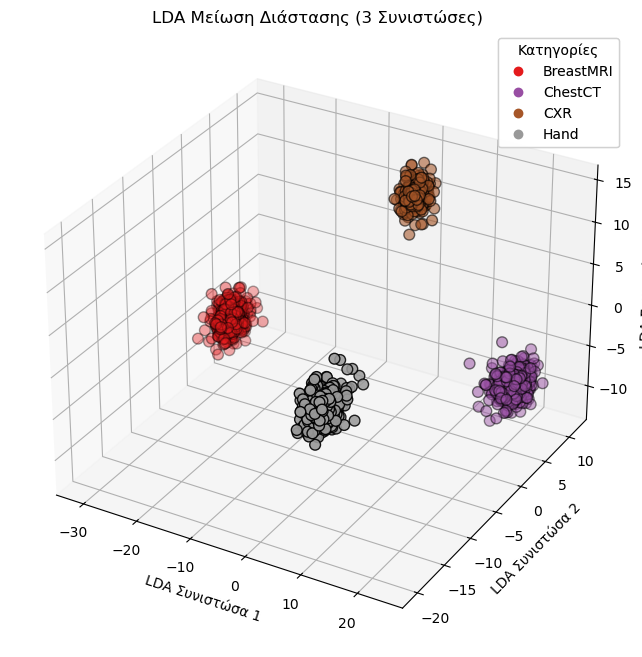

In [5]:
# Δημιουργία 3D scatter plot για τα δεδομένα μετά την LDA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Σχεδίαση των σημείων εκπαίδευσης
scatter = ax.scatter(X_train_lda[:, 0], X_train_lda[:, 1], X_train_lda[:, 2], 
                     c=y_train, cmap='Set1', s=60, edgecolor='k')

# Ρυθμίσεις γραφήματος
ax.set_xlabel('LDA Συνιστώσα 1')
ax.set_ylabel('LDA Συνιστώσα 2')
ax.set_zlabel('LDA Συνιστώσα 3')
ax.set_title('LDA Μείωση Διάστασης (3 Συνιστώσες)')

# Αντιστοίχιση των αριθμητικών labels στις κατηγορίες
# Εδώ βάζουμε τις κατηγορίες από την `class_names` (π.χ. 'BreastMRI', 'ChestCT', κλπ)
class_labels = ['BreastMRI', 'ChestCT', 'CXR', 'Hand']

# Δημιουργία του υπομνήματος (legend) με τις ονομαστικές κατηγορίες
legend1 = ax.legend(handles=scatter.legend_elements()[0], 
                    labels=class_labels, 
                    title="Κατηγορίες")
ax.add_artist(legend1)

plt.show()

In [6]:
# Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train_lda, y_train)

# Predict on test set
y_pred = nb_clf.predict(X_test_lda)

# Evaluate
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Naive Bayes Test Accuracy: 0.9816666666666667

Naive Bayes Classification Report:
               precision    recall  f1-score   support

   BreastMRI       0.98      1.00      0.99       300
     ChestCT       0.99      0.98      0.98       300
         CXR       0.98      0.98      0.98       300
        Hand       0.98      0.97      0.97       300

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



Confusion  Matrix:
 [[300   0   0   0]
 [  1 294   1   4]
 [  1   2 294   3]
 [  4   2   4 290]]


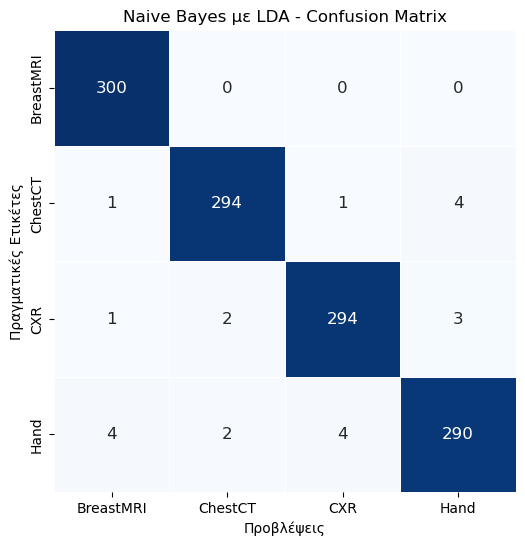

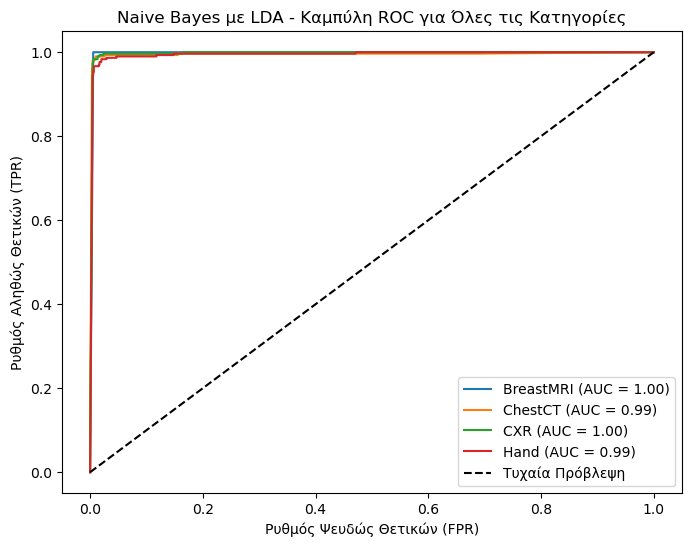

In [7]:
def plot_confusion_matrix(cm, class_labels, title="Confusion Matrix"):
    """
    Εμφανίζει τον Confusion Matrix χωρίς τις διαχωριστικές γραμμές.
    
    Παράμετροι:
        cm: Confusion Matrix
        class_labels: Λίστα ετικετών κατηγοριών
        title: Τίτλος του γραφήματος
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels,
                cbar=False, square=True, annot_kws={"size": 12}, linewidths=0.5, linecolor='white')  # Το 'linewidths=0.5' αφαιρεί τις γραμμές
    plt.xlabel('Προβλέψεις')
    plt.ylabel('Πραγματικές Ετικέτες')
    plt.title(title)
    plt.show()

def evaluate_model_performance(clf, X_test, y_test, class_labels=None, title_prefix=""):
    """
    Εκτελεί αξιολόγηση και οπτικοποίηση της απόδοσης ενός εκπαιδευμένου μοντέλου.
    
    Παράμετροι:
        clf: Εκπαιδευμένος ταξινομητής
        X_test: Δεδομένα του test set (χαρακτηριστικά)
        y_test: Πραγματικές ετικέτες του test set
        class_labels: Λίστα ετικετών κατηγοριών (προαιρετικό)
        title_prefix: Πρόθεμα τίτλου για τα γραφήματα (προαιρετικό)
    """
    # Δημιουργία προβλέψεων με το μοντέλο
    y_pred = clf.predict(X_test)
    if class_labels is None:
        class_labels = np.unique(y_test)

    # Υπολογισμός και εμφάνιση του (Confusion Matrix)
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)
    print("Confusion  Matrix:\n", cm)
    plot_confusion_matrix(cm, class_names, title=f"{title_prefix} - Confusion Matrix")

    # Υπολογισμός και εμφάνιση καμπύλης ROC 
    y_score = None
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
    elif hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test)

    if y_score is not None:
        # Μετατροπή σε δυαδική μορφή για κάθε κατηγορία 
        y_test_bin = label_binarize(y_test, classes=class_labels)
        plt.figure(figsize=(8, 6))
        for i, class_label in enumerate(class_labels):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])  # Υπολογισμός των FPR και TPR
            roc_auc = auc(fpr, tpr)  # Υπολογισμός του AUC
            plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Τυχαία Πρόβλεψη')  # Προσθήκη της γραμμής της τυχαίας πρόβλεψης
        plt.xlabel('Ρυθμός Ψευδώς Θετικών (FPR)')
        plt.ylabel('Ρυθμός Αληθώς Θετικών (TPR)')
        plt.title(f'{title_prefix} - Καμπύλη ROC για Όλες τις Κατηγορίες')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("Η καμπύλη ROC και το AUC δεν είναι διαθέσιμα για αυτόν τον ταξινομητή.")

# Αξιολόγηση της απόδοσης του ταξινομητή Naive Bayes με PCA
evaluate_model_performance(nb_clf, X_test_lda, y_test, class_labels=np.unique(y_train), title_prefix="Naive Bayes με LDA")

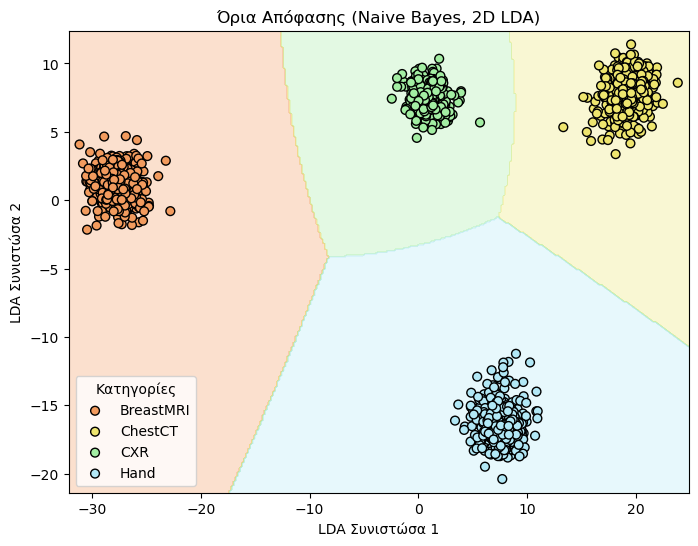

In [8]:
# Ονόματα των κατηγοριών (π.χ., για το BreastMRI, ChestCT κ.λπ.)
class_names = ['BreastMRI', 'ChestCT', 'CXR', 'Hand']

# Χρωματικός χάρτης
colors = ["#F29B5E", "#EEE56F", "#A3EEA3", "#B2E8F6"]
custom_cmap = ListedColormap(colors)

# Μείωση των δεδομένων σε 2 PCA συνιστώσες
X_train_2d = X_train_lda[:, :2]
X_test_2d = X_test_lda[:, :2]

# Εκπαίδευση Naive Bayes πάνω στις 2 PCA συνιστώσες
nb_2d = GaussianNB()
nb_2d.fit(X_train_2d, y_train)

# Δημιουργία πλέγματος για την οπτικοποίηση των ορίων απόφασης
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Προβλέψεις στο πλέγμα
Z = nb_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Αντιστοίχιση προβλέψεων σε ακέραιες τιμές
class_labels, Z_int = np.unique(y_train, return_inverse=True)
label_to_int = {label: idx for idx, label in enumerate(class_labels)}
Z_int = np.array([label_to_int[label] for label in Z])
Z_int = Z_int.reshape(xx.shape)

# Οπτικοποίηση των ορίων απόφασης του Naive Bayes
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_int, alpha=0.3, cmap=custom_cmap)
plt.contour(xx, yy, Z_int, colors='none')

handles = []  # Για να κρατήσουμε τα handles των κατηγοριών για το υπομνημα

for i, class_label in enumerate(class_names):  # Χρησιμοποιούμε τα ονόματα των κατηγοριών εδώ
    idx = np.where(y_train == i)
    scatter = plt.scatter(X_train_2d[idx, 0], X_train_2d[idx, 1],
                label=f'{class_label}',  # Εδώ εμφανίζονται τα ονόματα
                edgecolor='k', s=40,
                c=[custom_cmap(i)] * len(idx[0]))

    # Προσθήκη των σημείων στο handle για το υπομνημα
    handles.append(scatter)

# Ρυθμίσεις γραφήματος
plt.xlabel('LDA Συνιστώσα 1')
plt.ylabel('LDA Συνιστώσα 2')
plt.title('Όρια Απόφασης (Naive Bayes, 2D LDA)')
plt.grid(False)
# Προσθήκη του υπομνήματος με τα ονόματα των κατηγοριών
plt.legend(handles=handles, title="Κατηγορίες", loc='best')
plt.show()

In [9]:
# Grid search για εύρεση καλύτερων παραμέτρων με Naive Bayes και PCA features

# Define parameter grid for GaussianNB
param_grid = {
    'var_smoothing': np.logspace(0, -50, 10)  # Typical range for var_smoothing
}

# Initialize GaussianNB classifier
nb = GaussianNB()

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=nb,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=2
)

# Fit on PCA-reduced training data
grid_search.fit(X_train_lda, y_train)

# Best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test_lda)
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'var_smoothing': np.float64(1.0)}
Best cross-validation score: 1.0
Naive Bayes Test Accuracy: 0.9766666666666667

Naive Bayes Classification Report:
               precision    recall  f1-score   support

   BreastMRI       0.99      1.00      0.99       300
     ChestCT       1.00      0.96      0.98       300
         CXR       0.95      0.99      0.97       300
        Hand       0.98      0.95      0.96       300

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



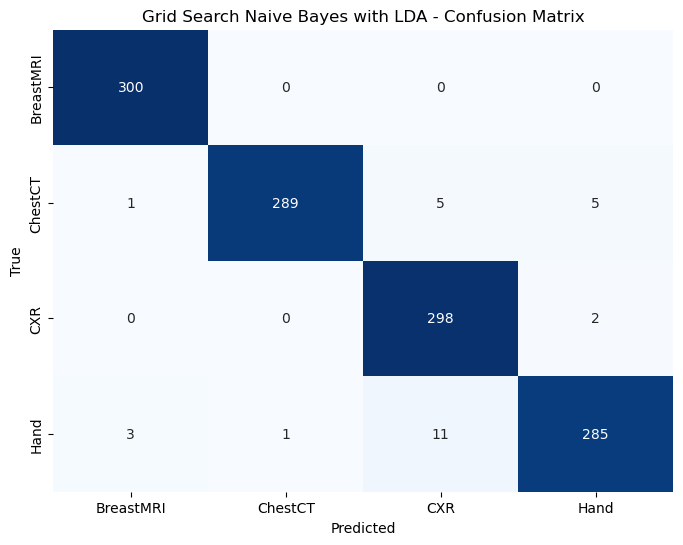

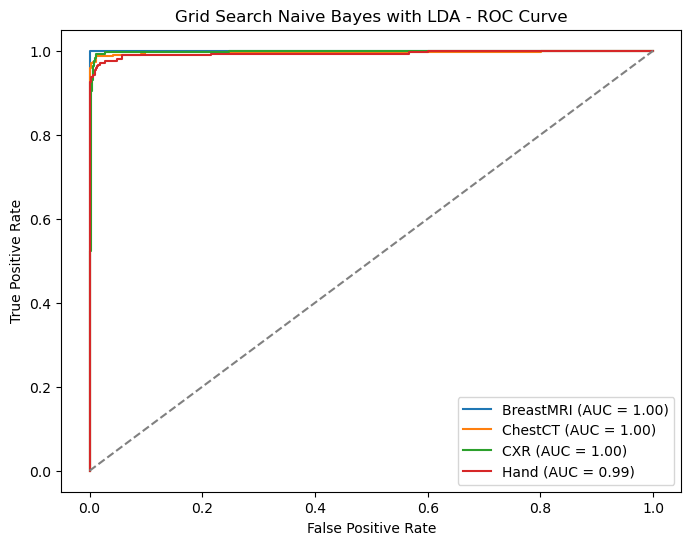

In [10]:
# Συνάρτηση αξιολόγησης του μοντέλου (Confusion Matrix και ROC Curve)
def assess_model_performance(model, X_test, y_test, class_names, title_prefix=""):
    """
    Εκτελεί αξιολόγηση του μοντέλου και εμφανίζει τον Confusion Matrix και την ROC Curve.
    
    Παράμετροι:
        model: Το εκπαιδευμένο μοντέλο
        X_test: Δεδομένα του test set
        y_test: Πραγματικές ετικέτες του test set
        class_names: Λίστα με τα ονόματα των κατηγοριών
        title_prefix: Πρόθεμα τίτλου για τα γραφήματα (προαιρετικό)
    """
    # 1. Εμφάνιση του Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Οπτικοποίηση του Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False)
    plt.title(f'{title_prefix} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # 2. Εμφάνιση του ROC Curve για κάθε κατηγορία (multi-class)
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarize the labels for ROC
    y_pred_prob = model.predict_proba(X_test)  # Χρησιμοποιούμε predict_proba για multi-class ROC

    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'{title_prefix} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Εφαρμογή της συνάρτησης αξιολόγησης στο μοντέλο που εκπαιδεύσαμε με GridSearchCV
assess_model_performance(grid_search.best_estimator_, X_test_lda, y_test, class_names=['BreastMRI', 'ChestCT', 'CXR', 'Hand'], title_prefix="Grid Search Naive Bayes with LDA")